Project Goal: Option pricing is a fundamental concept in financial mathematics. You can create a Python program that uses Monte Carlo simulation to estimate the value of European call and put options. Monte Carlo simulations are widely used in finance for pricing options and assessing risk. This project will not only enhance your understanding of financial mathematics but also your programming skills.

First we will implement our necessary libraries. In order to perform these calculations, we will need both numpy (for calculations) and scipy (to perform calculations based on a cdf).

In [56]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Now, we must decide how we would like to model our option prices. For simplicity sake, we will first focus on European Options. To price these options, we will implement the Black-Sholes-Merton model to obtain theoretical price benchmarks. We can create two functions, one for call options and one for put options.

In [57]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    call_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + (sigma**2 / 2)) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    N_d1 = norm.cdf(-d1)
    N_d2 = norm.cdf(-d2)
    put_price = K * np.exp(-r * T) * N_d2 - S * N_d1
    return put_price

Next we must have a method to calculate the payoff of our option. Since we are currently looking at European options, the payoff is simply going to be the maximum between the difference between it's value at the time of expiration

In [58]:
def calculate_option_payoff(asset_price, strike_price, option_type):
    if option_type.lower() == 'put':
        return max(0, strike_price - asset_price)
    elif option_type.lower() == 'call':
        return max(0, asset_price - strike_price)

To model the price path of the option, we will implement Geometric Brownian motion. To do so, we can start from the SDE for and discretize it based on a time step.

In [59]:
def generate_price_path(S, t, mu, sigma, n_steps):
    price_path = np.zeros((n_steps, 2))
    dt = t / n_steps
    price = S
    for i in range(n_steps):
        drift = (mu - 0.5 * sigma**2) * dt
        randomness = sigma * np.sqrt(dt) * np.random.normal(0, 1)
        t += dt
        price *= np.exp(drift + randomness)
        price_path[i] = [t, price]
    return price_path


Now that we have functions implemented for our pricing models, we can turn to our simulation method. For this project, I have chose to use a Monte Carlo simulation to analyze the payoffs of these options.

In [60]:
def monte_carlo_simulation(S, K, t, r, sigma, n_steps, n_simulations, option_type):
    option_payoffs = []
    for _ in range(n_simulations):
        stock_path = generate_price_path(S, t, r, sigma, n_steps)
        stock_price = stock_path[-1, 1]  # Final asset price
        option_payoff = calculate_option_payoff(stock_price, K, option_type)
        option_payoffs.append(option_payoff)
        plt.plot(stock_path[:, 0], stock_path[:, 1])
    expected_payoff = np.mean(option_payoffs)
    option_price = expected_payoff * np.exp(-r * t)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Monte Carlo Simulation - Stock Price Paths')
    plt.show()
    return option_price

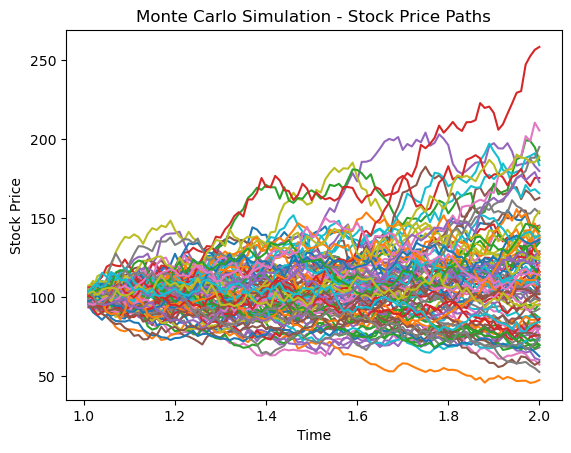

Estimated Option Price: 25.72427989927568


In [61]:
# Test Parameters
S = 100
K = 90
t = 1
r = 0.1
sigma = 0.30
n_steps = 100
n_simulations = 100
option_type = 'call'

option_price = monte_carlo_simulation(S, K, t, r, sigma, n_steps, n_simulations, option_type)
print("Estimated Option Price:", option_price)